# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster.hierarchy import linkage,dendrogram

numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Dataset

In [ ]:
df = pd.read_csv('flight.csv')
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

# No. 1

## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.isna().sum().sort_values(ascending=False)

WORK_PROVINCE        3248
WORK_CITY            2269
SUM_YR_1              551
AGE                   420
SUM_YR_2              138
WORK_COUNTRY           26
GENDER                  3
MEMBER_NO               0
LAST_FLIGHT_DATE        0
Points_Sum              0
avg_discount            0
EXCHANGE_COUNT          0
MAX_INTERVAL            0
AVG_INTERVAL            0
LAST_TO_END             0
BP_SUM                  0
SEG_KM_SUM              0
FFP_DATE                0
FLIGHT_COUNT            0
LOAD_TIME               0
FFP_TIER                0
FIRST_FLIGHT_DATE       0
Point_NotFlight         0
dtype: int64

In [ ]:
df.isna().sum().sort_values(ascending=False) / len(df)*100

WORK_PROVINCE        5.156538
WORK_CITY            3.602273
SUM_YR_1             0.874770
AGE                  0.666794
SUM_YR_2             0.219089
WORK_COUNTRY         0.041278
GENDER               0.004763
MEMBER_NO            0.000000
LAST_FLIGHT_DATE     0.000000
Points_Sum           0.000000
avg_discount         0.000000
EXCHANGE_COUNT       0.000000
MAX_INTERVAL         0.000000
AVG_INTERVAL         0.000000
LAST_TO_END          0.000000
BP_SUM               0.000000
SEG_KM_SUM           0.000000
FFP_DATE             0.000000
FLIGHT_COUNT         0.000000
LOAD_TIME            0.000000
FFP_TIER             0.000000
FIRST_FLIGHT_DATE    0.000000
Point_NotFlight      0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
nums = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
df.sample(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
44995      34236  1/31/2013         2/25/2013   Male         4  changshu   
40358      59755  5/19/2012         5/29/2012   Male         4   guiyang   
54578      25308  1/14/2013        12/19/2013   Male         4  shanghai   
46604      50534  7/28/2011         1/10/2012   Male         4   kunshan   
62252      52651  9/28/2011         5/11/2013   Male         4  shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
44995       jiangsu           CN  35.0  3/31/2014  ...    1907.0        6534   
40358       guizhou           CN  37.0  3/31/2014  ...    1144.0        5930   
54578      shanghai           CN  36.0  3/31/2014  ...    1966.0        3597   
46604       jiangsu           CN  46.0  3/31/2014  ...    1114.0        5430   
62252             .           CN  54.0  3/31/2014  ...     922.0        1359   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
44995         10/3/2013          181     55.000000           73   
40358         5/30/2013          307     36.600000          115   
54578         1/25/2014           67     37.000000           37   
46604         3/16/2014           16    237.333333          601   
62252         5/13/2013          324      2.000000            2   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
44995               0      0.555152        2583                0  
40358               0      0.770363        4338                0  
54578               0      0.574865        1307                0  
46604               0      0.614431        2650                0  
62252               0      0.581604         506                0  

[5 rows x 23 columns]

In [ ]:
df[nums].describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

In [ ]:
df[cats].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

## Value Counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liao

## Duplicate, Unique, and Lowercase/Uppercase Values

In [ ]:
print(df[df.duplicated()].shape)
df.duplicated().any()

(0, 23)


False

In [ ]:
cats

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

In [ ]:
len(df['WORK_PROVINCE'].unique())

1166

In [ ]:
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].str.lower()
len(df['WORK_PROVINCE'].unique())

1046

In [ ]:
len(df['WORK_COUNTRY'].unique())

119

In [ ]:
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].str.lower()
len(df['WORK_COUNTRY'].unique())

118

## Univariate Analysis

### Box Plot (Numericals)

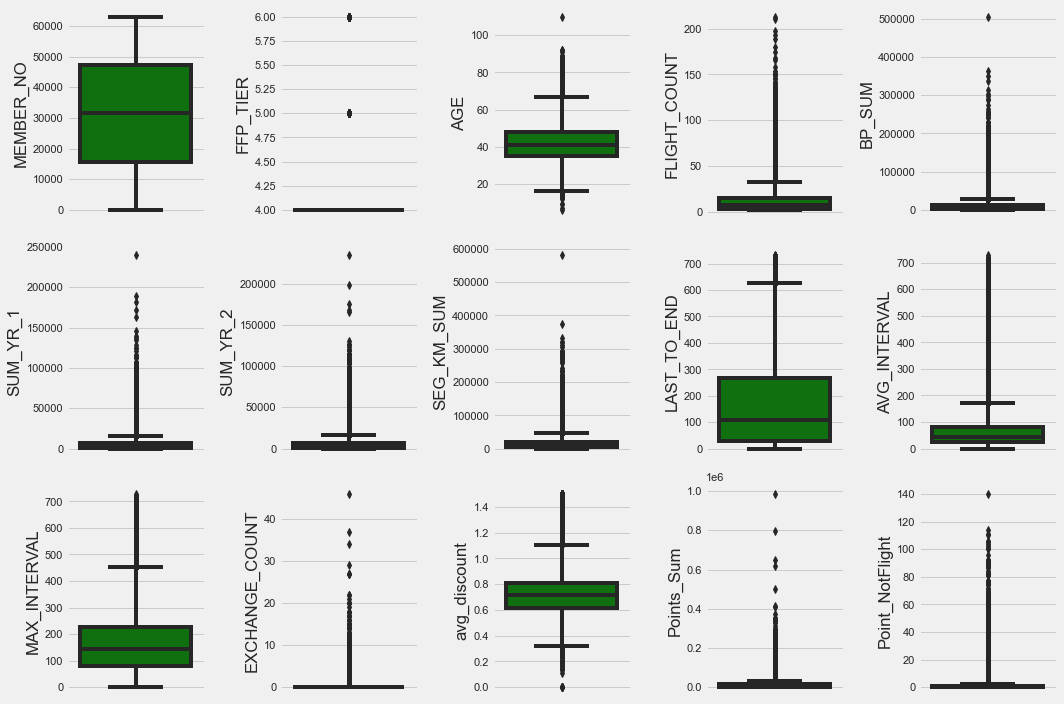

In [ ]:
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Dist Plot (Numericals)

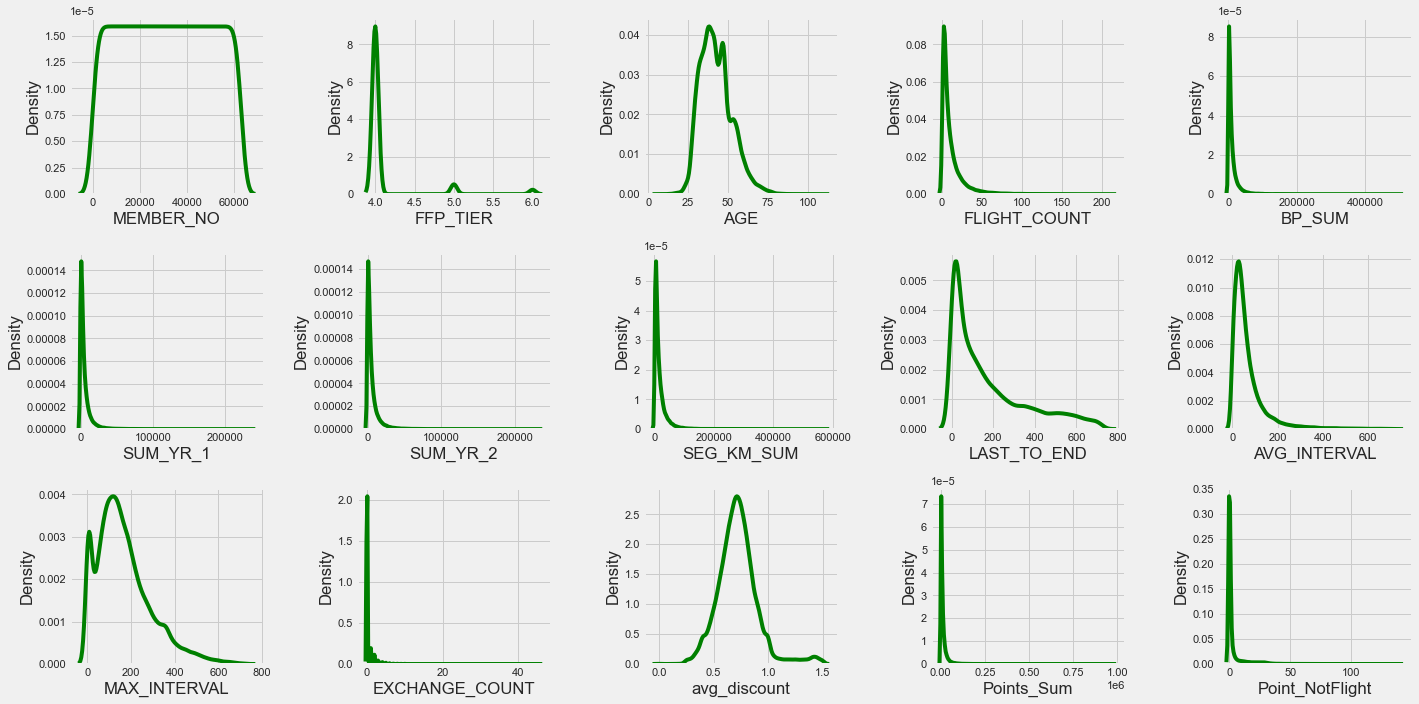

In [ ]:
plt.figure(figsize=(20,10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

### Count Plot (Categoricals)

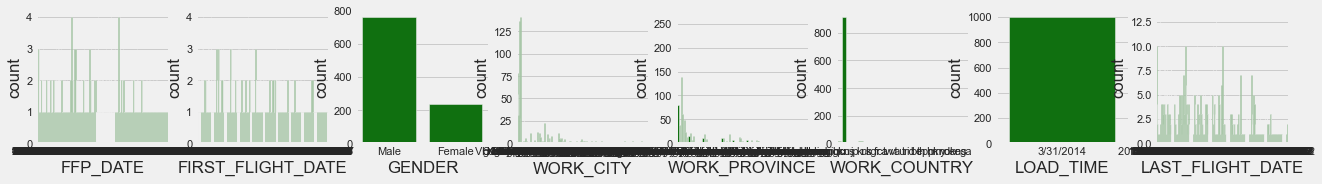

In [ ]:
df_sample = df.sample(1000, random_state = 77)
plt.figure(figsize=(20, 5))
for i in range(0, len(cats)):
    plt.subplot(2, len(cats), i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')

## Multivariate Analysis

In [ ]:
df.corr()

MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.005910  0.001259     -0.000276  0.000063   
FFP_TIER         -0.005910  1.000000  0.078654      0.582447  0.581085   
AGE               0.001259  0.078654  1.000000      0.073246  0.100501   
FLIGHT_COUNT     -0.000276  0.582447  0.073246      1.000000  0.788379   
BP_SUM            0.000063  0.581085  0.100501      0.788379  1.000000   
SUM_YR_1         -0.002529  0.463122  0.111815      0.748032  0.850624   
SUM_YR_2          0.001185  0.611385  0.083743      0.794838  0.884632   
SEG_KM_SUM       -0.000032  0.522350  0.087254      0.850411  0.921724   
LAST_TO_END      -0.002588 -0.206313 -0.025600     -0.404999 -0.319039   
AVG_INTERVAL      0.002479 -0.144928 -0.024613     -0.316833 -0.246764   
MAX_INTERVAL      0.004761 -0.127641  0.009382     -0.188682 -0.147953   
EXCHANGE_COUNT   -0.003844  0.342355  0.029604      0.502501  0.530021   
avg_discount      0.001727  0.248845  0.133235      0.139377  0.307245   
Points_Sum       -0.003613  0.559249  0.074757      0.747092  0.923271   
Point_NotFlight  -0.033204  0.192803 -0.092282      0.291880  0.244254   

                 SUM_YR_1  SUM_YR_2  SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
MEMBER_NO       -0.002529  0.001185   -0.000032    -0.002588      0.002479   
FFP_TIER         0.463122  0.611385    0.522350    -0.206313     -0.144928   
AGE              0.111815  0.083743    0.087254    -0.025600     -0.024613   
FLIGHT_COUNT     0.748032  0.794838    0.850411    -0.404999     -0.316833   
BP_SUM           0.850624  0.884632    0.921724    -0.319039     -0.246764   
SUM_YR_1         1.000000  0.663009    0.804125    -0.186173     -0.243309   
SUM_YR_2         0.663009  1.000000    0.849195    -0.423420     -0.246290   
SEG_KM_SUM       0.804125  0.849195    1.000000    -0.369509     -0.280746   
LAST_TO_END     -0.186173 -0.423420   -0.369509     1.000000     -0.108594   
AVG_INTERVAL    -0.243309 -0.246290   -0.280746    -0.108594      1.000000   
MAX_INTERVAL    -0.145206 -0.154905   -0.155508    -0.343939      0.724392   
EXCHANGE_COUNT   0.488029  0.468149    0.507819    -0.169717     -0.130226   
avg_discount     0.268884  0.234652    0.108393    -0.021036     -0.038814   
Points_Sum       0.788354  0.826666    0.853014    -0.292027     -0.220946   
Point_NotFlight  0.235095  0.237954    0.259037    -0.124074     -0.075967   

                 MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
MEMBER_NO            0.004761       -0.003844      0.001727   -0.003613   
FFP_TIER            -0.127641        0.342355      0.248845    0.559249   
AGE                  0.009382        0.029604      0.133235    0.074757   
FLIGHT_COUNT        -0.188682        0.502501      0.139377    0.747092   
BP_SUM              -0.147953        0.530021      0.307245    0.923271   
SUM_YR_1            -0.145206        0.488029      0.268884    0.788354   
SUM_YR_2            -0.154905        0.468149      0.234652    0.826666   
SEG_KM_SUM          -0.155508        0.507819      0.108393    0.853014   
LAST_TO_END         -0.343939       -0.169717     -0.021036   -0.292027   
AVG_INTERVAL         0.724392       -0.130226     -0.038814   -0.220946   
MAX_INTERVAL         1.000000       -0.089417     -0.016392   -0.135977   
EXCHANGE_COUNT      -0.089417        1.000000      0.112589    0.578581   
avg_discount        -0.016392        0.112589      1.000000    0.263882   
Points_Sum          -0.135977        0.578581      0.263882    1.000000   
Point_NotFlight     -0.042843        0.396115     -0.010315    0.406905   

                 Point_NotFlight  
MEMBER_NO              -0.033204  
FFP_TIER                0.192803  
AGE                    -0.092282  
FLIGHT_COUNT            0.291880  
BP_SUM                  0.244254  
SUM_YR_1                0.235095  
SUM_YR_2                0.237954  
SEG_KM_SUM              0.259037  
LAST_TO_END            -0.124074  
AVG_INTERVAL           -0.075967

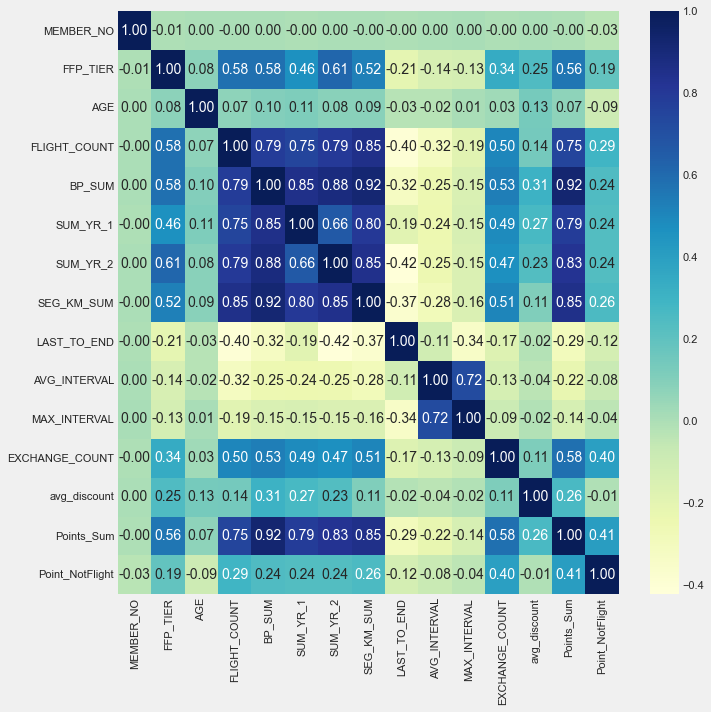

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f');

Pengamatan korelasi antar fitur yg memiliki high correlative:
1. FLIGHT_COUNT - Point_Sum (0.75)
2. FLIGHT_COUNT - SEG_KM_SUM (0.85)
3. FLIGHT_COUNT - SUM_YR_1 (0.75)
4. FLIGHT_COUNT - SUM_YR_2 (0.79)
5. FLIGHT_COUNT - BP_SUM (0.79)
6. BP_SUM - SEG_KM_SUM (0.90)
7. BP_SUM - SUM_YR_1 (0.85)
8. BP_SUM - SUM_YR_2 (0.88)
9. Point_Sum - BP_SUM (0.92)
10. Point_Sum - SUM_YR_1 (0.79)
11. Point_Sum - SUM_YR_2 (0.83)
12. Point_Sum - SEG_KM_SUM (0.85)
13. SUM_YR_1 - SEG_KM_SUM (0.80)
14. SUM_YR_1 - SUM_YR_2 (0.66)
15. SUM_YR_2 - SEG_KM_SUM (0.85)
16. SUM_YR_2 - FFP_TIER (0.61)
17. AVG_INTERVAL - MAX_INTERVAL (0.72)

<Figure size 1440x1440 with 0 Axes>

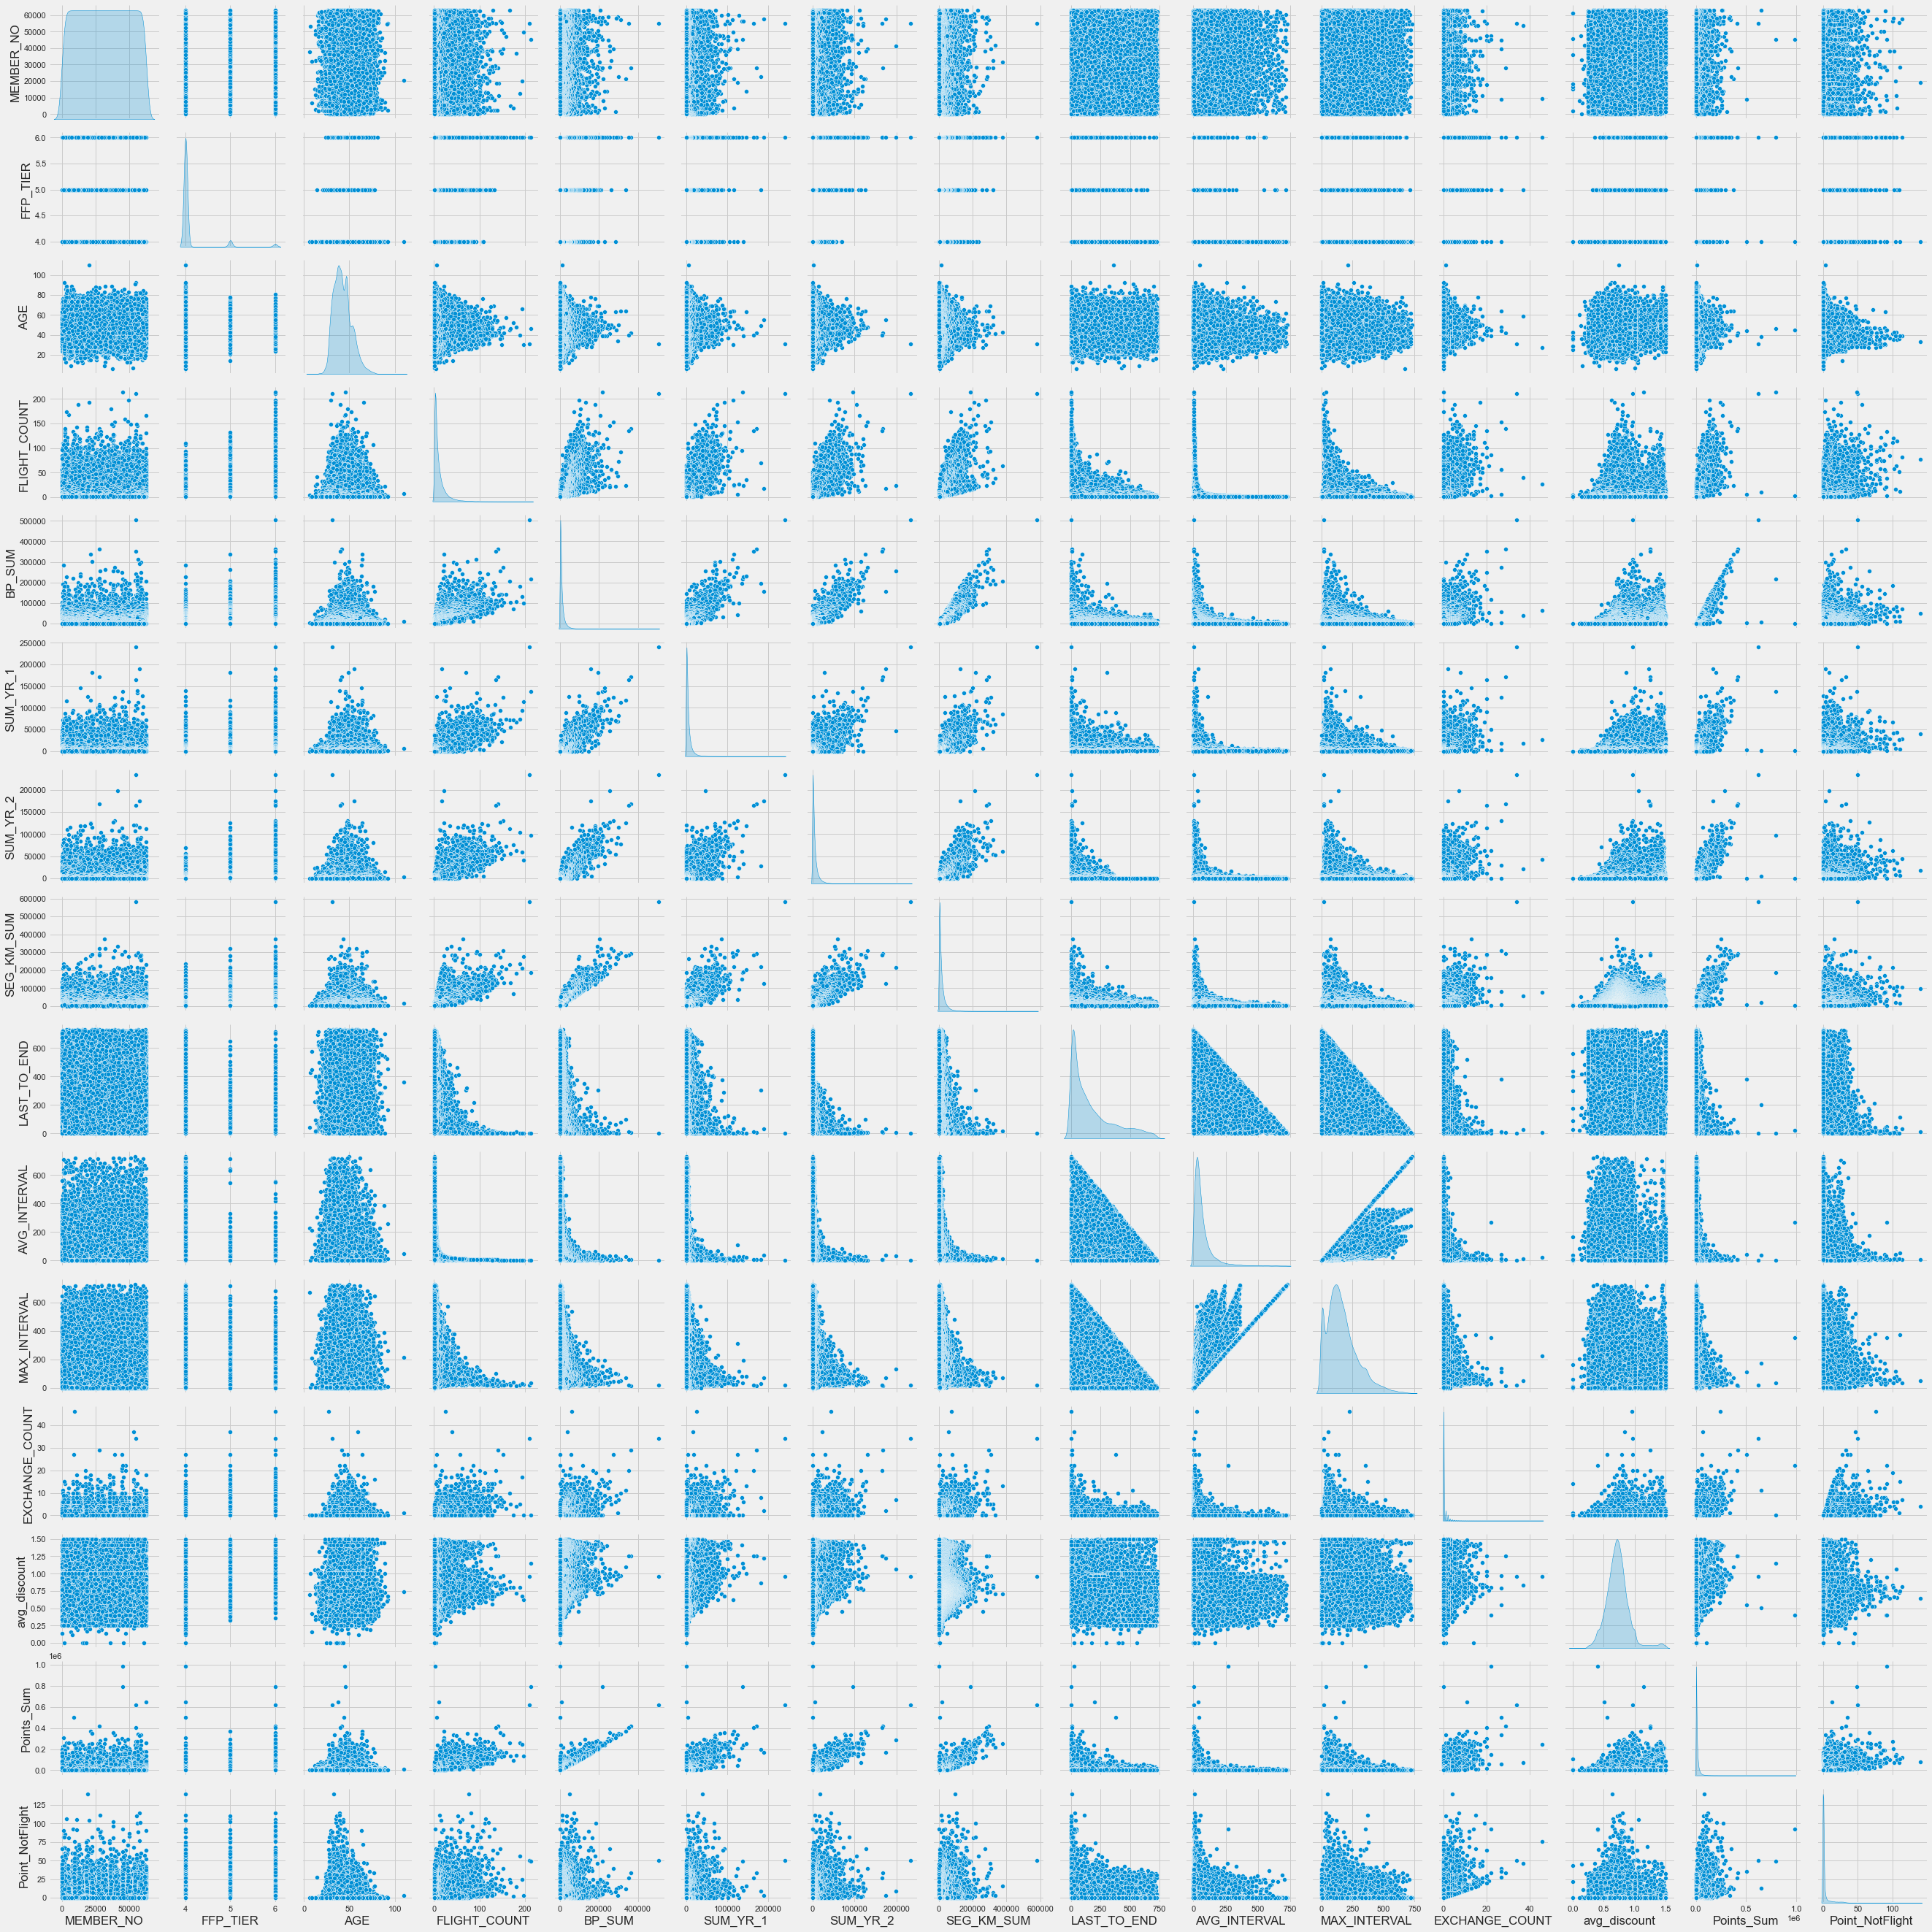

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, diag_kind='kde');

### Recency

In [ ]:
df['LAST_TO_END'].describe()

count    62988.000000
mean       176.120102
std        183.822223
min          1.000000
25%         29.000000
50%        108.000000
75%        268.000000
max        731.000000
Name: LAST_TO_END, dtype: float64

In [ ]:
df['LAST_TO_END'].isnull().value_counts()

False    62437
Name: LAST_TO_END, dtype: int64

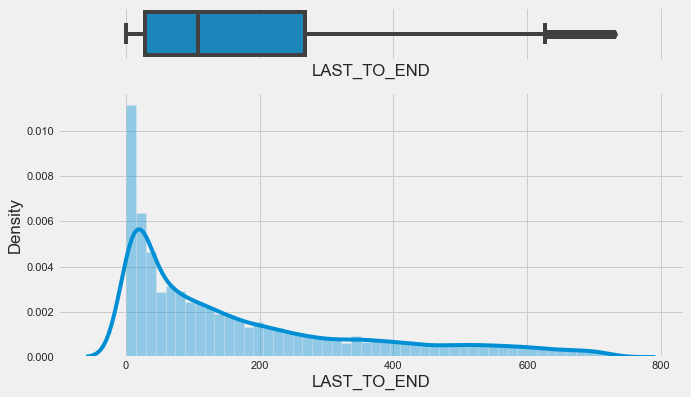

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['LAST_TO_END'], ax=ax_box)
sns.distplot(df['LAST_TO_END'], ax=ax_hist)
plt.show()

### Frequency

In [ ]:
df['FLIGHT_COUNT'].describe()

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

In [ ]:
df['FLIGHT_COUNT'].isnull().value_counts()

False    62437
Name: FLIGHT_COUNT, dtype: int64

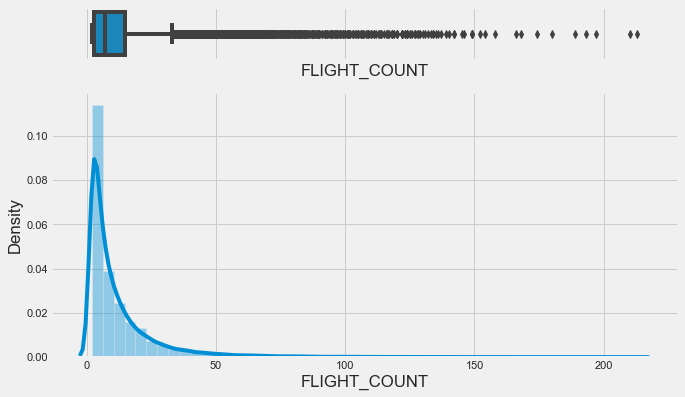

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['FLIGHT_COUNT'], ax=ax_box)
sns.distplot(df['FLIGHT_COUNT'], ax=ax_hist)
plt.show()

### Monetary

In [ ]:
df['SUM_YR_1'].describe()

count     62437.000000
mean       5355.376064
std        8109.450147
min           0.000000
25%        1003.000000
50%        2800.000000
75%        6574.000000
max      239560.000000
Name: SUM_YR_1, dtype: float64

In [ ]:
df['SUM_YR_1'].isnull().value_counts()

False    62437
Name: SUM_YR_1, dtype: int64

In [ ]:
# Melakukan drop missing values pada fitur `SUM_YR_1`
df = df.dropna(subset=['SUM_YR_1'])

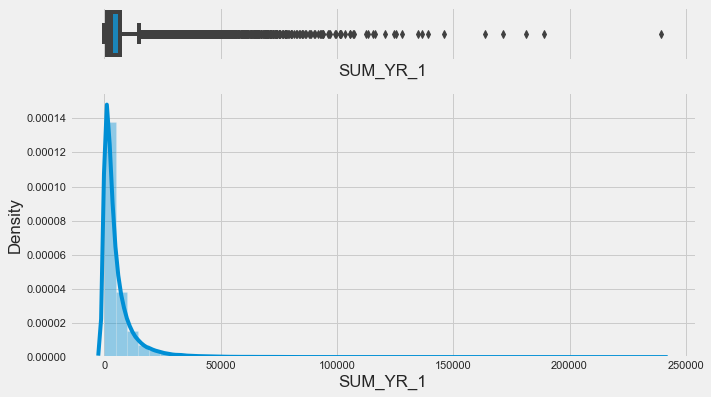

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['SUM_YR_1'], ax=ax_box)
sns.distplot(df['SUM_YR_1'], ax=ax_hist)
plt.show()

# No. 2

Fitur yang digunakan dibagi berdasarkan segmentasi:
- **Recency** `LAST_TO_END`: Kebaruan, kapan terakhir kali customer membeli tiket penerbangan,
- **Frequency** `FLIGHT_COUNT`: melihat frekuensi berapa kali customer melakukan penerbangan,
- **Monetary** `SUM_YR_1`: nilai monetary, berapa banyak uang yang yang sudah dihabiskan customer dalam perjalanan penerbangannya.

In [ ]:
df = df.copy()

In [ ]:
df_rfm = df[['LAST_TO_END','FLIGHT_COUNT','SUM_YR_1']]
df_rfm.columns = ['R','F','M']
df_rfm_drop = df_rfm[['R','F','M']]

In [ ]:
df_rfm_drop.head()

R    F         M
0   1  210  239560.0
1   7  140  171483.0
2  11  135  163618.0
3  97   23  116350.0
4   5  152  124560.0

In [ ]:
df_rfm_drop.describe()

R             F              M
count  62437.000000  62437.000000   62437.000000
mean     172.892484     11.920160    5355.376064
std      181.122108     14.083226    8109.450147
min        1.000000      2.000000       0.000000
25%       29.000000      3.000000    1003.000000
50%      106.000000      7.000000    2800.000000
75%      261.000000     15.000000    6574.000000
max      731.000000    213.000000  239560.000000

## Handling Outliers

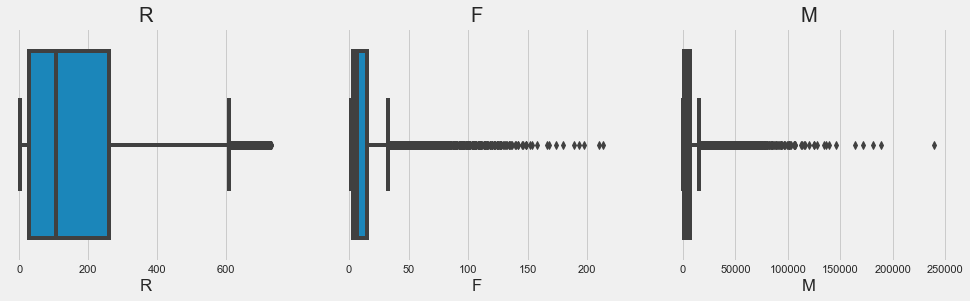

In [ ]:
RFM = ['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_rfm_drop[col])
        plt.title(col)
        i = i+1     
dist_list(RFM)

In [ ]:
rfm_log = df_rfm_drop.copy()

In [ ]:
cols=['R','F','M']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut

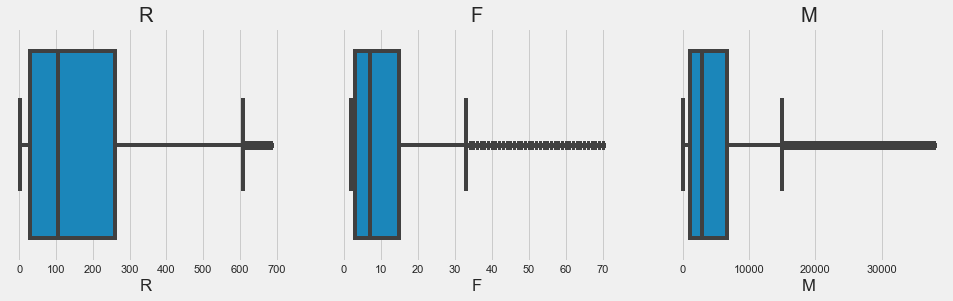

In [ ]:
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(rfm_log[col])
        plt.title(col)
        i = i+1
        
dist_list(RFM)

In [ ]:
rfm_log.shape

(62437, 3)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_std = rfm_log
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

In [ ]:
df_std.head()

R         F    M
0  0.000000  1.000000  1.0
1  0.008772  1.000000  1.0
2  0.014620  1.000000  1.0
3  0.140351  0.308824  1.0
4  0.005848  1.000000  1.0

## Feature Engineering

Feature Selection:
Semua fitur dilakukan drop kecuali kolom `LAST_TO_END`, `FLIGHT_COUNT`, `SUM_YR_1`.

Feature Extraction:
Setelah melakukan drop kolom, fitur yang baru diubah namingnya menjadi per segmentasi (Recency, Frequency, Monetary):
- `LAST_TO_END` -> R
- `FLIGHT_COUNT` -> F
- `SUM_YR_1` -> M

# No. 3

## K-Means

### Elbow Method

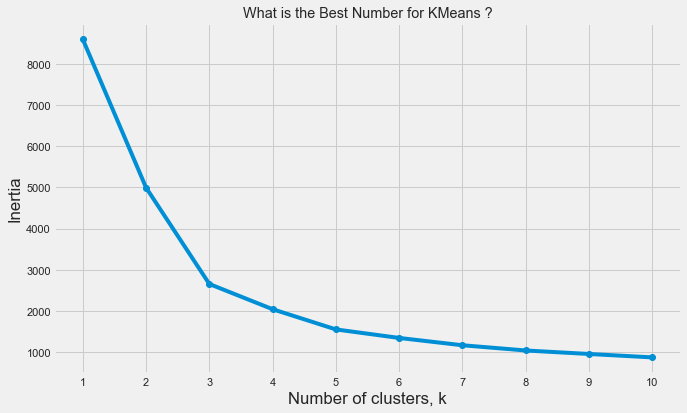

In [ ]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=77)
    kc.fit(df_std)
    cluster = kc.fit_predict(df_std)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

Best Cluster: 3

### Clustering K-Means

In [ ]:
kc = KMeans(init='k-means++', n_clusters= 3, random_state=77)
kc.fit(df_std)
cluster_labels = kc.labels_

data_c = df_std.assign(K_Cluster = cluster_labels)
data_label=df_rfm.assign(K_Cluster = cluster_labels)

In [ ]:
data_f=data_c.groupby('K_Cluster').mean()
data_f['count']=pd.value_counts(data_c['K_Cluster'])

In [ ]:
data_f

R         F         M  count
K_Cluster                                     
0          0.662442  0.031420  0.087912  14796
1          0.135849  0.107956  0.084946  40074
2          0.056474  0.545775  0.503915   7567

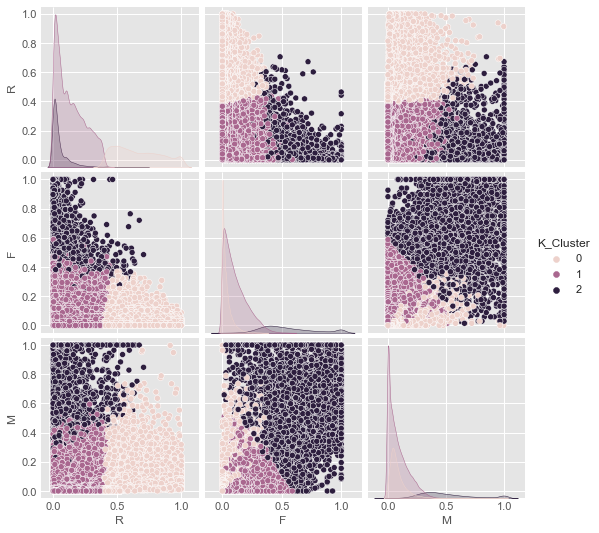

In [ ]:
sns.pairplot(data=data_c, hue='K_Cluster');

### Evaluasi Cluster

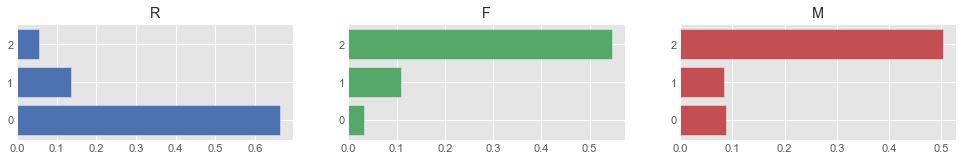

In [ ]:
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(RFM)

K-Means
- 0 = Low Value
- 1 = General
- 2 = Loyal

### Silhouette Score

In [ ]:
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=77).fit(df_std)
    preds = clusterer.predict(df_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_std, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.32698526676597534
For n_clusters = 3. The average silhouette_score is : 0.41966905511633124
For n_clusters = 4. The average silhouette_score is : 0.3570707177653772
For n_clusters = 5. The average silhouette_score is : 0.29315516266694125


# No. 4

In [ ]:
data_labeling = df.assign(K_Cluster = cluster_labels)

In [ ]:
cluster = [] #membuat list kosong
for i, k in data_labeling.iterrows(): #iterasi setiap row
    if k['K_Cluster'] == 0:
        cluster_name = 'Low Value'
    elif k['K_Cluster'] == 1:
        cluster_name = 'General'
    else:
        cluster_name = 'Loyal'
    cluster.append(cluster_name)
    
data_labeling['cluster'] = cluster #membuat kolom dari list
data_label['cluster'] = cluster #membuat kolom dari list

In [ ]:
df_me = data_label.groupby(data_label['cluster']).mean()
df_me['count'] = pd.value_counts(data_label['cluster'])
df_me

R          F             M  K_Cluster  count
cluster                                                         
General     93.920921   9.341019   3223.860109        1.0  40074
Low Value  454.936199   4.136591   3336.404926        0.0  14796
Loyal       39.627990  40.798467  20591.409806        2.0   7567

Deskripsi customer di setiap cluster:
- **K-Cluster = 0** dinamakan sebagai cluster `Low Value` karena customer pada cluster ini tidak banyak melakukan perjalanan, mengeluarkan sedikit uang untuk perjalanan, serta sudah lama tidak melakukan perjalanan dengan perusahaan penerbangan tersebut,
- **K-Cluster = 1** dinamakan sebagai cluster `General` karena customer pada cluster ini memiliki tingkat perjalanan, tingkat pengeluaran uang untuk perjalanan, serta tingkat kebaruan perjalanan yang cenderung menengah/standar,
- **K-Cluster = 2** dinamakan sebagai cluster `Loyal` karena customer pada cluster ini memiliki tingkat perjalanan dan tingkat pengeluaran uang yang cenderung tinggi, serta melakukan perjalanan terakhir yang terhitung baru.

Rekomendasi bisnis:
1. Membuat program frequent flyer yang ditawarkan kepada customer di cluster `Loyal` (2) untuk menjaga kesetiaan customer dalam menggunakan layanan airline tersebut, 
2. Memberikan voucher/diskon kepada customer di cluster `General` (1) untuk meningkatkan ketertarikan customer dalam menggunakan layanan airline tersebut,
3. Membuat campaign marketing pada customer di cluster `Low` (0) agar mendapatkan lebih banyak customer di berbagai target pasar.